# **ANÁLISIS DE FACTORES QUE INFLUYEN EN LA CAPACIDAD COGNITIVA**

In [4]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [5]:
df_analisis= pd.read_csv("df_test.csv")
df_analisis.sample(4)

,user_id,age,gender,sleep_duration,stress_level,diet_type,daily_screen_time,exercise_frequency,caffeine_intake,reaction_time,memory_test_score,cognitive_score,ai_predicted_score
25757,25758,28,Female,9.6,3,Vegetarian,9.3,Low,478,216.97,75,86.03,89.53
73473,73474,41,Male,9.9,8,Non-Vegetarian,1.0,Medium,409,233.22,61,90.75,89.69
11713,11714,26,Female,7.3,8,Non-Vegetarian,7.9,High,448,332.09,75,69.94,67.46
43476,43477,26,Male,7.3,10,Non-Vegetarian,3.4,Low,398,282.00,55,57.04,56.03


In [6]:
df_analisis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             80000 non-null  int64  
 1   age                 80000 non-null  int64  
 2   gender              80000 non-null  object 
 3   sleep_duration      80000 non-null  float64
 4   stress_level        80000 non-null  int64  
 5   diet_type           80000 non-null  object 
 6   daily_screen_time   80000 non-null  float64
 7   exercise_frequency  80000 non-null  object 
 8   caffeine_intake     80000 non-null  int64  
 9   reaction_time       80000 non-null  float64
 10  memory_test_score   80000 non-null  int64  
 11  cognitive_score     80000 non-null  float64
 12  ai_predicted_score  80000 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 7.9+ MB


In [7]:
df_analisis.columns

Index(['user_id', 'age', 'gender', 'sleep_duration', 'stress_level',
       'diet_type', 'daily_screen_time', 'exercise_frequency',
       'caffeine_intake', 'reaction_time', 'memory_test_score',
       'cognitive_score', 'ai_predicted_score'],
      dtype='object')

In [8]:
def obtener_conteo_valores_unicos(df_analisis):
    conteo_unicos = {}
    for columna in df_analisis.columns:
        conteo_unicos[columna] = df_analisis[columna].value_counts()
    return conteo_unicos

diccionario_conteo = obtener_conteo_valores_unicos(df_analisis)

print("\nConteo de valores únicos por columna:")
for columna, conteo in diccionario_conteo.items():
    print(f"\n'{columna}':\n{conteo}")


Conteo de valores únicos por columna:

'user_id':
user_id
1        1
53331    1
53338    1
53337    1
53336    1
        ..
26667    1
26666    1
26665    1
26664    1
80000    1
Name: count, Length: 80000, dtype: int64

'age':
age
40    1979
50    1972
32    1963
29    1961
49    1959
44    1956
37    1955
43    1944
18    1941
33    1938
28    1928
19    1925
54    1924
58    1921
34    1921
55    1920
47    1920
48    1918
35    1915
56    1915
27    1914
22    1909
39    1909
51    1902
25    1901
30    1893
46    1888
53    1887
57    1887
31    1878
38    1877
24    1875
42    1872
59    1868
41    1859
21    1858
36    1853
20    1848
52    1848
26    1847
23    1829
45    1823
Name: count, dtype: int64

'gender':
gender
Female    38404
Male      38322
Other      3274
Name: count, dtype: int64

'sleep_duration':
sleep_duration
9.9     1410
4.4     1408
6.8     1407
7.9     1407
5.4     1394
        ... 
4.8     1263
4.9     1259
5.6     1246
4.0      678
10.0     669
Name: coun

Pasos para el Análisis:

- Visualizaciones: 
    La clave ahora es crear visualizaciones para entender mejor las distribuciones de cada variable y las relaciones entre ellas. 

    Algunas visualizaciones útiles podrían ser:

    **Histogramas y gráficos de densidad**: Para variables numéricas (*age, sleep_duration, stress_level, daily_screen_time, caffeine_intake, reaction_time, memory_test_score, cognitive_score, ai_predicted_score*) para ver sus distribuciones.

    **Gráficos de barras**: Para variables categóricas (g*ender, diet_type, exercise_frequency*) para ver las proporciones de cada categoría.

    **Boxplots**: Para comparar la distribución de una variable numérica entre diferentes categorías de una variable categórica (*ej., sleep_duration por gender*).

    **Scatter plots**: Para visualizar la relación entre dos variables numéricas (*ej., sleep_duration vs. cognitive_score*).

    **Heatmap de correlación**: Para ver las correlaciones entre todas las variables numéricas.

    **Estadísticas Descriptivas**: Calcular medidas como la media, mediana, desviación estándar, cuartiles para las variables numéricas para cuantificar sus características centrales y dispersión. *(.describe())*

    **Análisis Bivariado y Multivariado**: Investigar las relaciones entre pares y grupos de variables. 
    Por ejemplo, *¿cómo se relaciona la edad con la duración del sueño y el rendimiento de la memoria?* 
    *¿Hay diferencias en el rendimiento cognitivo entre diferentes tipos de dieta y niveles de ejercicio?*

In [9]:
''' Identificador de usuario ("user_id") , 
Edad ("age"), 
Género ("gender), 
Duración del sueño ("sleep_duration"), 
Nivel de estrés("stress_level"), 
Tipo de dieta ("diet_type"), 
Tiempo diario de pantalla ("daily_screen_time"), 
Frecuencia de ejercicio ("exercise_frequency"), 
Consumo de cafeína ("caffeine_intake"), 
Tiempo de reacción ("reaction_time"), 
Puntuación de la prueba de memoria ("memory_test_score"), 
Puntuación cognitiva ("cognitive_score"), 
Puntuación predicha por IA ("ai_predicted_score")'''

' Identificador de usuario ("user_id") , \nEdad ("age"), \nGénero ("gender), \nDuración del sueño ("sleep_duration"), \nNivel de estrés("stress_level"), \nTipo de dieta ("diet_type"), \nTiempo diario de pantalla ("daily_screen_time"), \nFrecuencia de ejercicio ("exercise_frequency"), \nConsumo de cafeína ("caffeine_intake"), \nTiempo de reacción ("reaction_time"), \nPuntuación de la prueba de memoria ("memory_test_score"), \nPuntuación cognitiva ("cognitive_score"), \nPuntuación predicha por IA ("ai_predicted_score")'

Las preguntas que vamos a responder en función de que las estadísticas nos den resultados a destacar son:
1. ¿Cuál es la relación de edad y duración del sueño?
2. Ver correlaciones numéricas en Heatmap
3. ¿Relación puntuación pruebas y nivel de ingesta de cafeína?
4. ¿Relación dieta con puntuaciones?
5. ¿Relación ingesta de cafeína con horas de sueño?
6. ...

**Es importante clasificar las puntuaciones de los tests para una mejor interpretación de los resultados**

In [10]:
df_analisis["age"].unique()

array([57, 39, 26, 32, 50, 36, 48, 35, 29, 54, 18, 51, 24, 19, 21, 37, 20,
       33, 23, 22, 46, 44, 58, 43, 45, 49, 42, 47, 38, 27, 41, 31, 56, 30,
       55, 53, 34, 25, 59, 52, 28, 40], dtype=int64)

In [11]:
df_analisis.head()

,user_id,age,gender,sleep_duration,stress_level,diet_type,daily_screen_time,exercise_frequency,caffeine_intake,reaction_time,memory_test_score,cognitive_score,ai_predicted_score
0,1,57,Female,6.5,3,Non-Vegetarian,6.5,Medium,41,583.33,65,36.71,39.77
1,2,39,Female,7.6,9,Non-Vegetarian,10.8,High,214,368.24,58,54.35,57.68
2,3,26,Male,8.2,6,Vegetarian,5.7,Low,429,445.21,49,32.57,29.54
3,4,32,Male,7.8,9,Vegetarian,8.3,Low,464,286.33,94,70.15,74.59
4,5,50,Male,9.7,2,Non-Vegetarian,11.3,Medium,365,237.65,62,87.54,91.78


## Lineplot relacionando la edad y las horas de sueño promedio por persona al día

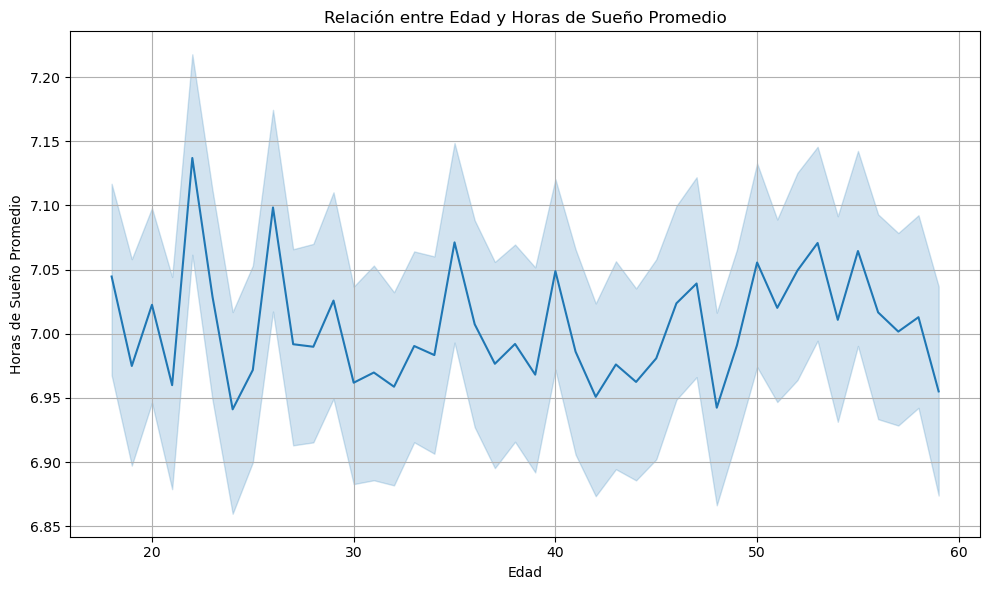

In [12]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='sleep_duration', data=df_analisis)
plt.title('Relación entre Edad y Horas de Sueño Promedio')
plt.xlabel('Edad')
plt.ylabel('Horas de Sueño Promedio')
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
lista = df_analisis.columns, 

*age*

> ¿Cómo se distribuyen las edades de los individuos en el conjunto de datos?
 
> ¿Hay algún grupo de edad predominante?

Histograma de la variable "age": Esta gráfica mostraría la distribución de las edades de los individuos en el DataFrame, lo que nos permitiría obtener información sobre la dispersión y la forma de la distribución.

<Axes: xlabel='age', ylabel='Count'>

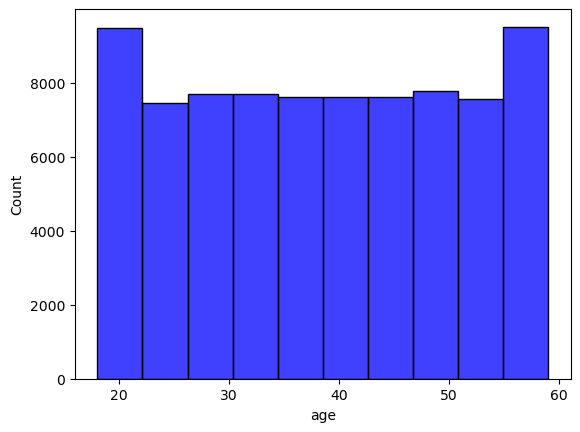

In [14]:
sns.histplot(df_analisis, x="age", bins=10, kde=False, color="blue")

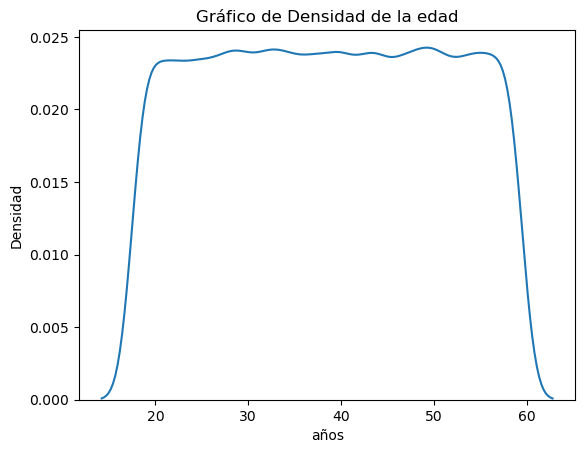

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ejemplo con seaborn
sns.kdeplot(df_analisis['age'])
plt.title('Gráfico de Densidad de la edad')
plt.xlabel('años')
plt.ylabel('Densidad')
plt.show()

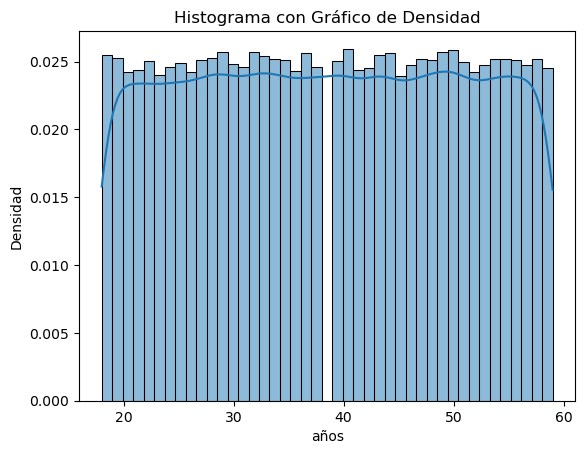

In [16]:
# También puedes superponerlo con un histograma
sns.histplot(df_analisis['age'], kde=True, stat="density")
plt.title('Histograma con Gráfico de Densidad')
plt.xlabel('años')
plt.ylabel('Densidad')
plt.show()

## Dividir edad por rangos:
Vamos a dividir la variable 'age' en rangos que representen diferentes generaciones. Esta es una propuesta de rangos generacionales comunes:

- Generación Z (Gen Z): 13 - 28 años (aproximadamente nacidos entre 1997 y 2007)
- Millennials (Generación Y): 29 - 44 años (aproximadamente nacidos entre 1981 y 1996)
- Generación X: 45 - 60 años (aproximadamente nacidos entre 1965 y 1980)

In [17]:
def clasificar_generacion(edad):
    """Clasifica la edad en grupos generacionales."""
    if 13 <= edad <= 28:
        return 'Gen Z'
    elif 29 <= edad <= 44:
        return 'Millennials'
    elif 45 <= edad <= 60:
        return 'Generación X'
    return None  # Para edades fuera de estos rangos (si las hubiera)
        

### Añadimos la columna de niveles categóricos

In [18]:
df_analisis['generation'] = df_analisis['age'].apply(clasificar_generacion)

In [19]:
# ¿Cuantos usuarios hay en cada generación?
df_analisis['generation'].value_counts()

generation
Millennials     30673
Generación X    28552
Gen Z           20775
Name: count, dtype: int64

### Visualización por generación

**Gráfico de quesitos**

Text(0, 0.5, 'Frecuencia')

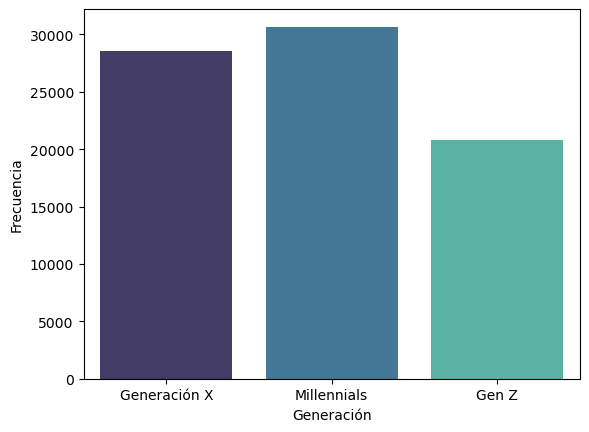

In [20]:
sns.countplot(x = "generation", 
              data = df_analisis, 
              palette = "mako", 
              color = "b")
plt.xlabel("Generación")
plt.ylabel("Frecuencia")

### *Analizar cómo las generaciones difieren en otras variables:*

**Agrupamos por 'generacion' y calculamos estadísticas descriptivas (media, mediana, etc.) para otras columnas como 'sleep_duration', 'stress_level', 'memory_test_score', etc.*

In [21]:
print(df_analisis.groupby('generation')['sleep_duration'].mean())
print(df_analisis.groupby('generation')['memory_test_score'].mean())
print(df_analisis.groupby('generation')['stress_level'].mean())

generation
Gen Z           7.014522
Generación X    7.015712
Millennials     6.989447
Name: sleep_duration, dtype: float64
generation
Gen Z           69.516390
Generación X    69.451667
Millennials     69.529586
Name: memory_test_score, dtype: float64
generation
Gen Z           5.494248
Generación X    5.501366
Millennials     5.486356
Name: stress_level, dtype: float64


*sleep_duration* *x* *generation*

## Lineplot para variables edad y horas de sueño

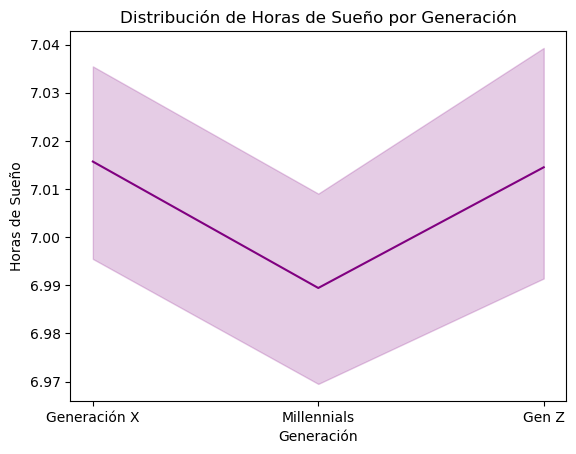

In [22]:
sns.lineplot(x='generation', y='sleep_duration', data=df_analisis, color = "purple")
plt.title('Distribución de Horas de Sueño por Generación')
plt.xlabel('Generación')
plt.ylabel('Horas de Sueño')
plt.show()

## *Por generación lo vemos más claro*

*gender*

> ¿Qué ocurre con la variable 'Other'?

> ¿Influirá el género en la capacidad cognitiva o el nivel de estrés?

## Gráfico de barras para ver relación de géneros 

Text(0, 0.5, 'Frecuencia')

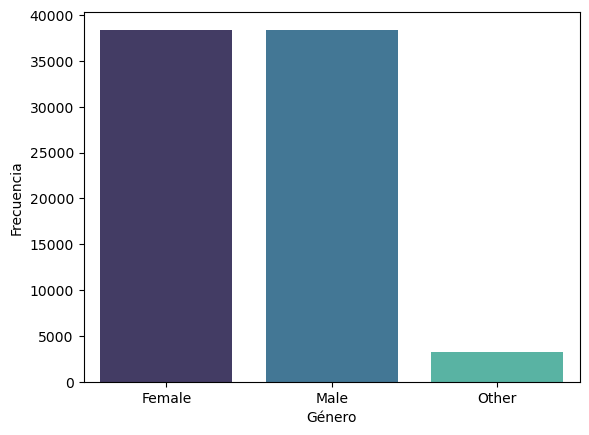

In [23]:
sns.countplot(x = "gender", 
              data = df_analisis, 
              palette = "mako", 
              color = "b")
plt.xlabel("Género")
plt.ylabel("Frecuencia")

*sleep_duration*

> ¿Cuál es la distribución general de la duración del sueño?

> ¿Hay valores atípicos (duraciones de sueño muy cortas o muy largas)?

## Gráfico de cajas o boxplot para ver valores atípicos

Text(0.5, 0, 'Horas de sueño')

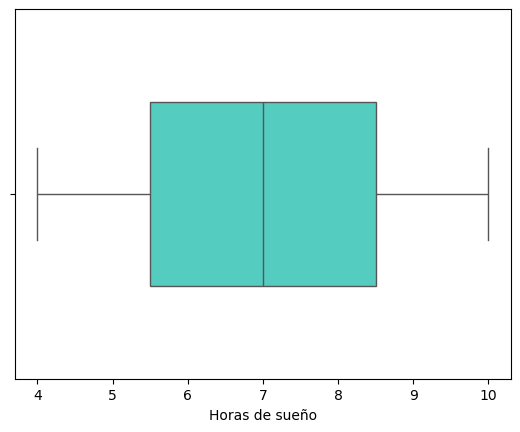

In [24]:
sns.boxplot(x = "sleep_duration", 
            data = df_analisis, 
            width = 0.5, 
            color = "turquoise")
plt.xlabel("Horas de sueño")

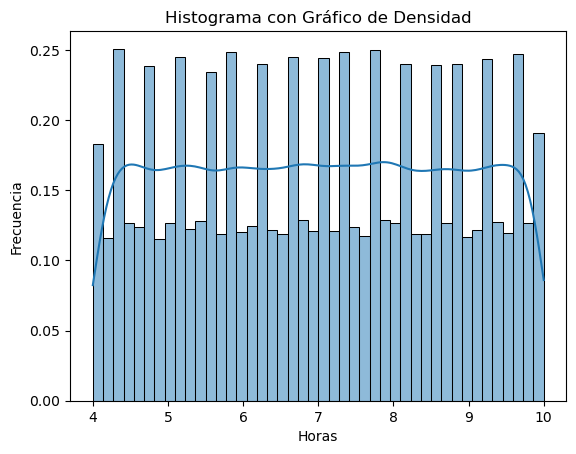

In [25]:
# También puedes superponerlo con un histograma
sns.histplot(df_analisis['sleep_duration'], kde=True, stat="density")
plt.title('Histograma con Gráfico de Densidad')
plt.xlabel('Horas')
plt.ylabel('Frecuencia')
plt.show()

*diet_type*

## Gráfico de barras para ver relación de dietas

Text(0, 0.5, 'Frecuencia')

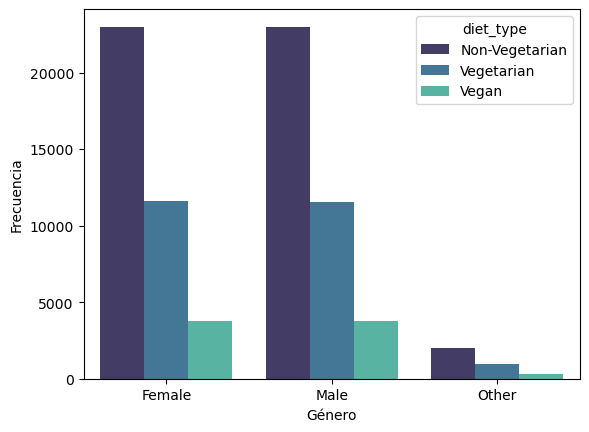

In [26]:
sns.countplot(x = "gender", 
              data = df_analisis, 
              palette = "mako", 
              color = "b",
              hue = "diet_type")
plt.xlabel("Género")
plt.ylabel("Frecuencia")

*stress_level*

## Dividir nivel de estrés por rangos:
Vamos a dividir la variable 'stress_level' en rangos que representen diferentes niveles para mejorar la visualización de los datos:
- Bajo: 1 - 3
- Medio: 4 - 7
- Alto: 8 - 10

In [27]:
def clasificar_stress(nivel):
    """Clasifica el nivel de estrés en categorías."""
    if 1 <= nivel <= 3:
        return 'Low'
    elif 4 <= nivel <= 7:
        return 'Medium'
    elif 8 <= nivel <= 10:
        return 'High'
    return None  # Para valores fuera del rango esperado (si los hubiera)


### Añadimos la columna de niveles categóricos en la variable de nivel de estrés

In [28]:
df_analisis['stress_category'] = df_analisis['stress_level'].apply(clasificar_stress)

In [29]:
df_analisis.sample()

,user_id,age,gender,sleep_duration,stress_level,diet_type,daily_screen_time,exercise_frequency,caffeine_intake,reaction_time,memory_test_score,cognitive_score,ai_predicted_score,generation,stress_category
55150,55151,53,Male,5.8,7,Non-Vegetarian,4.6,Medium,190,324.32,72,73.85,74.69,Generación X,Medium


*caffeine_intake*

In [30]:
'''Según indica la Administración de Alimentos y Medicamentos (FDA) estadounidense 
y como cita el portal de divulgación sobre salud Healthline, las dosis de hasta 400mg al día 
(entre dos y tres tazas de café) son seguras para la mayoría de las personas. '''

'Según indica la Administración de Alimentos y Medicamentos (FDA) estadounidense \ny como cita el portal de divulgación sobre salud Healthline, las dosis de hasta 400mg al día \n(entre dos y tres tazas de café) son seguras para la mayoría de las personas. '

## Dividir los miligramos de cafeína por niveles para una mejor comprensión de los datos.

Nos basamos en la información de varias búsquedas en línea en webs de alta fiabilidad para proponer una clasificación por rangos de ingesta diaria de cafeína (en mg):

- Sin Cafeína / Muy Bajo: 0 - 10 mg (Típicamente encontrado en descafeinado o cantidades traza en algunos alimentos).
- Bajo: 11 - 80 mg (Aproximadamente el contenido de una taza de té o una porción pequeña de chocolate).
- Moderado: 81 - 200 mg (Aproximadamente el contenido de 1-2 tazas de café estándar).
- Medio-Alto: 201 - 300 mg (Aproximadamente el contenido de 2-3 tazas de café fuerte o algunas bebidas energéticas).
- Alto: 301 - 400 mg (La mayoría de las fuentes consideran que hasta 400 mg al día es seguro para adultos sanos).
- Muy Alto: 401 - 499 mg (Supera las recomendaciones diarias para muchas personas y podría aumentar el riesgo de efectos secundarios).

In [31]:
def clasificar_cafeina(ingesta_mg):
    """Clasifica la ingesta de cafeína en rangos (mg)."""
    if 0 <= ingesta_mg <= 10:
        return 'Almost nothing'
    elif 11 <= ingesta_mg <= 80:
        return 'Low'
    elif 81 <= ingesta_mg <= 200:
        return 'Moderate'
    elif 201 <= ingesta_mg <= 300:
        return 'Medium-High'
    elif 301 <= ingesta_mg <= 400:
        return 'High'
    elif 401 <= ingesta_mg <= 499:
        return 'Too much'
    return None  # Para valores fuera del rango esperado (si los hubiera)

### Añadimos la columna de niveles categóricos en la variable de cantidad de cafeína tomada al día

In [32]:
df_analisis['caffeine_category'] = df_analisis['caffeine_intake'].apply(clasificar_cafeina)

In [33]:
df_analisis['caffeine_category'].isnull().sum() / len(df_analisis) * 100

0.0

In [34]:
df_analisis = df_analisis[df_analisis['caffeine_category'].notnull()]

## Decidimos dividir  las variables "reaction_time", memory_test_score", "cognitive_score" y "ai_predicted_score" en grupos para:

- Comparar fácilmente entre rangos (por ejemplo, bajo, medio, alto)

- Crear visualizaciones más limpias y comprensibles en Tableau

- Aplicar filtros, colores o agrupaciones sin depender de números exactos

*reaction time*

 La variable Reaction_Time está medida en milisegundos (ms), no en segundos. Es decir:

        - 200.00 ms = 0.2 segundos
        - 599.99 ms = 0.6 segundos

    Tiempo de reacción (segundos, mínimo 0.3 aprox., máximo 1.5 aprox.):

        - Muy rápido: 200 - 299 ms (0.200 – 0.299 segundos)
        - Rápido: 300 - 399 ms (0.300 – 0.399 segundos)
        - Promedio: 400 - 499 ms (0.400 – 0.499 segundos)
        - Lento: 500 - 599,99 ms (0.500 – 0.599 segundos)

In [35]:
def clasificar_reactiontime(ms):
    """Clasifica la velocidad de reacción por milisegundos (ms)"""
    ms = float(ms)
    if 200 <= ms <= 299:
        return 'Top fast'
    elif 300 <= ms <= 399:
        return 'Fast'
    elif 400 <= ms <= 499:
        return 'Normal'
    elif 500 <= ms <= 599.99:
        return 'Slow'
    return None  

In [36]:
df_analisis['reaction_time_category'] = df_analisis['reaction_time'].apply(clasificar_reactiontime)

In [37]:
df_analisis['reaction_time_category'].isnull().sum() / len(df_analisis) * 100

0.74125

Eliminamos valores nulos de las categorías

In [38]:
df_analisis = df_analisis[df_analisis['reaction_time_category'].notnull()]

*memory test score*

Los puntajes de la prueba de memoria parecen ser valores enteros dentro de un rango (viendo los valores más frecuentes).
    Memory_Test_Score (40 a 99 aprox.)
    
    Puntuación del test:
        - Baja: 40 – 59
        - Media: 60 – 79
        - Alta: 80 – 99

In [39]:
def clasificar_memorytest(score):
    """Clasifica la puntuación del test de memoria"""
    try:
        if pd.isnull(score):
            return None
        score = float(score)
        if 40 <= score <= 59:
            return 'Low' #Rendimiento de memoria bajo
        elif 60 <= score <= 79:
            return 'Medium' #Rendimiento promedio
        elif 80 <= score <= 99:
            return 'High' #Rendimiento de memoria alto
        else: 
            return None  
    except:
        return None  # En caso de error de tipo (por ejemplo, string)
    

In [40]:
df_analisis['memory_score_category'] = df_analisis['memory_test_score'].apply(clasificar_memorytest)

In [41]:
df_analisis['memory_score_category'].isnull().sum() / len(df_analisis) * 100

0.0

Eliminamos valores nulos de las categorías

In [42]:
df_analisis = df_analisis[df_analisis['memory_score_category'].notnull()]

*cognitive score*

Las puntuaciones cognitivas son valores continuos con decimales, lo que sugiere una métrica más compleja.
    Clasificación de Cognitive_Score (0 a 100)
    
        - 0 – 39 → Bajo: Rendimiento cognitivo bajo
        - 40 – 59 → Medio-bajo: Por debajo del promedio
        - 60 – 79 → Medio-alto: Por encima del promedio
        - 80 – 100 → Alto: Excelente rendimiento cognitivo

In [43]:
def clasificar_cognitivescore(score):
    """Clasifica la puntuación del test cognitivo"""
    try:
        if pd.isnull(score):
            return None
        score = float(score)
        if 0 <= score <= 39:
            return 'Low'
        elif 40 <= score <= 59:
            return 'Medium'
        elif 60 <= score <= 79:
            return 'Medium-High'
        elif 80 <= score <= 100:
            return 'High'
        else:
            return None  # Fuera de rango
    except:
        return None  # En caso de error de tipo (por ejemplo, string)


In [44]:
df_analisis['cognitive_category'] = df_analisis['cognitive_score'].apply(clasificar_cognitivescore)

In [45]:
df_analisis['cognitive_category'].isnull().sum() / len(df_analisis) * 100

3.9379399801025095

Eliminamos valores nulos de las categorías

In [46]:
df_analisis = df_analisis[df_analisis['cognitive_category'].notnull()]

*ai predicted score*

Similar a la puntuación cognitiva, esta es una puntuación predicha por IA con valores continuos.
    🤖 AI_Predicted_Score (0 a 100), de la misma manera:

          - Bajo: 0 – 39
          - Medio-bajo: 40 – 59
          - Medio-alto: 60 – 79
          - Alto: 80 – 100

In [47]:
def clasificar_aicognitivescore(score):
    """Clasifica la puntuación del test cognitivo predicho por la IA (Inteligencia Artificial)"""
    try:
        if pd.isnull(score):
            return None
        score = float(score)
        if 0 <= score <= 39:
            return 'Low'
        elif 40 <= score <= 59:
            return 'Medium'
        elif 60 <= score <= 79:
            return 'Medium-High'
        elif 80 <= score <= 100:
            return 'High'
        else: 
            return None
    except:
        return None  # En caso de error de tipo (por ejemplo, string)


In [48]:
df_analisis['ai_cognitive_category'] = df_analisis['ai_predicted_score'].apply(clasificar_aicognitivescore)

In [49]:
df_analisis['ai_cognitive_category'].isnull().sum() / len(df_analisis) * 100

3.5828526481384375

In [50]:
df_analisis = df_analisis[df_analisis['ai_cognitive_category'].notnull()]

Eliminamos valores nulos de las categorías

In [51]:
df_analisis = df_analisis[df_analisis['ai_cognitive_category'].notnull()]


In [52]:
df_analisis["ai_cognitive_category"].isnull().sum()

0

In [67]:
df_analisis.sample(10)

,user_id,age,gender,sleep_duration,stress_level,diet_type,daily_screen_time,exercise_frequency,caffeine_intake,reaction_time,memory_test_score,cognitive_score,ai_predicted_score,generation,stress_category,caffeine_category,reaction_time_category,memory_score_category,cognitive_category,ai_cognitive_category
42427,42428,22,Male,6.7,3,Non-Vegetarian,6.0,Low,254,576.88,77,30.67,34.34,Gen Z,Low,Medium-High,Slow,Medium,Low,Low
25146,25147,48,Male,4.7,4,Non-Vegetarian,8.7,Low,383,517.35,86,32.46,36.60,Generación X,Medium,High,Slow,High,Low,Low
44742,44743,46,Male,4.0,7,Non-Vegetarian,11.0,Medium,307,366.26,80,55.32,52.55,Generación X,Medium,High,Fast,High,Medium,Medium
40811,40812,29,Male,9.7,5,Vegetarian,3.1,Medium,394,260.85,69,92.90,97.46,Millennials,Medium,High,Top fast,Medium,High,High
79133,79134,57,Male,6.5,4,Vegetarian,9.6,Low,416,434.92,52,30.79,26.17,Generación X,Medium,Too much,Normal,Low,Low,Low
64023,64024,24,Female,8.2,10,Non-Vegetarian,4.1,Medium,202,519.78,42,25.58,22.13,Gen Z,High,Medium-High,Slow,Low,Low,Low
56916,56917,56,Female,6.6,9,Vegetarian,5.3,Low,311,389.42,71,46.63,47.13,Generación X,High,High,Fast,Medium,Medium,Medium
57304,57305,27,Male,9.1,4,Vegan,6.0,Medium,368,326.49,58,73.43,69.52,Gen Z,Medium,High,Fast,Low,Medium-High,Medium-High
60494,60495,34,Female,7.2,7,Vegan,2.4,High,229,409.99,82,74.89,76.34,Millennials,Medium,Medium-High,Normal,High,Medium-High,Medium-High
47066,47067,41,Female,4.7,3,Non-Vegetarian,11.1,Medium,74,386.78,54,52.81,53.64,Millennials,Low,Low,Fast,Low,Medium,Medium


_______________________________________________________________________________________

## Vamos a establecer medidas de correlación
*En primer lugar definimos cuáles son las variables numéricas*

In [54]:
numericas = df_analisis.select_dtypes(include=np.number).columns
numericas

Index(['user_id', 'age', 'sleep_duration', 'stress_level', 'daily_screen_time',
       'caffeine_intake', 'reaction_time', 'memory_test_score',
       'cognitive_score', 'ai_predicted_score'],
      dtype='object')

In [55]:
from itertools import combinations
# usando el metodo 'combinations' vamos a generar todas las combinaciones posibles de columnas
combinaciones = list(combinations(numericas, 2))
combinaciones

[('user_id', 'age'),
 ('user_id', 'sleep_duration'),
 ('user_id', 'stress_level'),
 ('user_id', 'daily_screen_time'),
 ('user_id', 'caffeine_intake'),
 ('user_id', 'reaction_time'),
 ('user_id', 'memory_test_score'),
 ('user_id', 'cognitive_score'),
 ('user_id', 'ai_predicted_score'),
 ('age', 'sleep_duration'),
 ('age', 'stress_level'),
 ('age', 'daily_screen_time'),
 ('age', 'caffeine_intake'),
 ('age', 'reaction_time'),
 ('age', 'memory_test_score'),
 ('age', 'cognitive_score'),
 ('age', 'ai_predicted_score'),
 ('sleep_duration', 'stress_level'),
 ('sleep_duration', 'daily_screen_time'),
 ('sleep_duration', 'caffeine_intake'),
 ('sleep_duration', 'reaction_time'),
 ('sleep_duration', 'memory_test_score'),
 ('sleep_duration', 'cognitive_score'),
 ('sleep_duration', 'ai_predicted_score'),
 ('stress_level', 'daily_screen_time'),
 ('stress_level', 'caffeine_intake'),
 ('stress_level', 'reaction_time'),
 ('stress_level', 'memory_test_score'),
 ('stress_level', 'cognitive_score'),
 ('stre

In [56]:
try: print(df_correlaciones = numericas.corr(method = "spearman"))
except: 'used_id'

In [57]:
# Calculate the correlation matrix for numerical columns
df_correlaciones = df_analisis[numericas].corr(method='spearman')

# Display the correlation matrix
df_correlaciones

,user_id,age,sleep_duration,stress_level,daily_screen_time,caffeine_intake,reaction_time,memory_test_score,cognitive_score,ai_predicted_score
user_id,1.000000,-0.006246,0.002964,-0.001376,-0.003469,-0.004293,-0.002116,0.003230,0.004590,0.003705
age,-0.006246,1.000000,0.000956,-0.000510,-0.002635,-0.003776,0.006737,-0.002095,-0.007485,-0.007973
sleep_duration,0.002964,0.000956,1.000000,0.000415,-0.001122,-0.001690,-0.016922,0.000886,0.149302,0.148486
stress_level,-0.001376,-0.000510,0.000415,1.000000,-0.002713,0.003926,0.001172,-0.002966,-0.226390,-0.224949
daily_screen_time,-0.003469,-0.002635,-0.001122,-0.002713,1.000000,-0.002182,0.010237,-0.004270,-0.197344,-0.195246
caffeine_intake,-0.004293,-0.003776,-0.001690,0.003926,-0.002182,1.000000,0.011785,-0.000150,-0.122585,-0.120975
reaction_time,-0.002116,0.006737,-0.016922,0.001172,0.010237,0.011785,1.000000,-0.019936,-0.830263,-0.824448
memory_test_score,0.003230,-0.002095,0.000886,-0.002966,-0.004270,-0.000150,-0.019936,1.000000,0.362002,0.359176
cognitive_score,0.004590,-0.007485,0.149302,-0.226390,-0.197344,-0.122585,-0.830263,0.362002,1.000000,0.992648
ai_predicted_score,0.003705,-0.007973,0.148486,-0.224949,-0.195246,-0.120975,-0.824448,0.359176,0.992648,1.000000


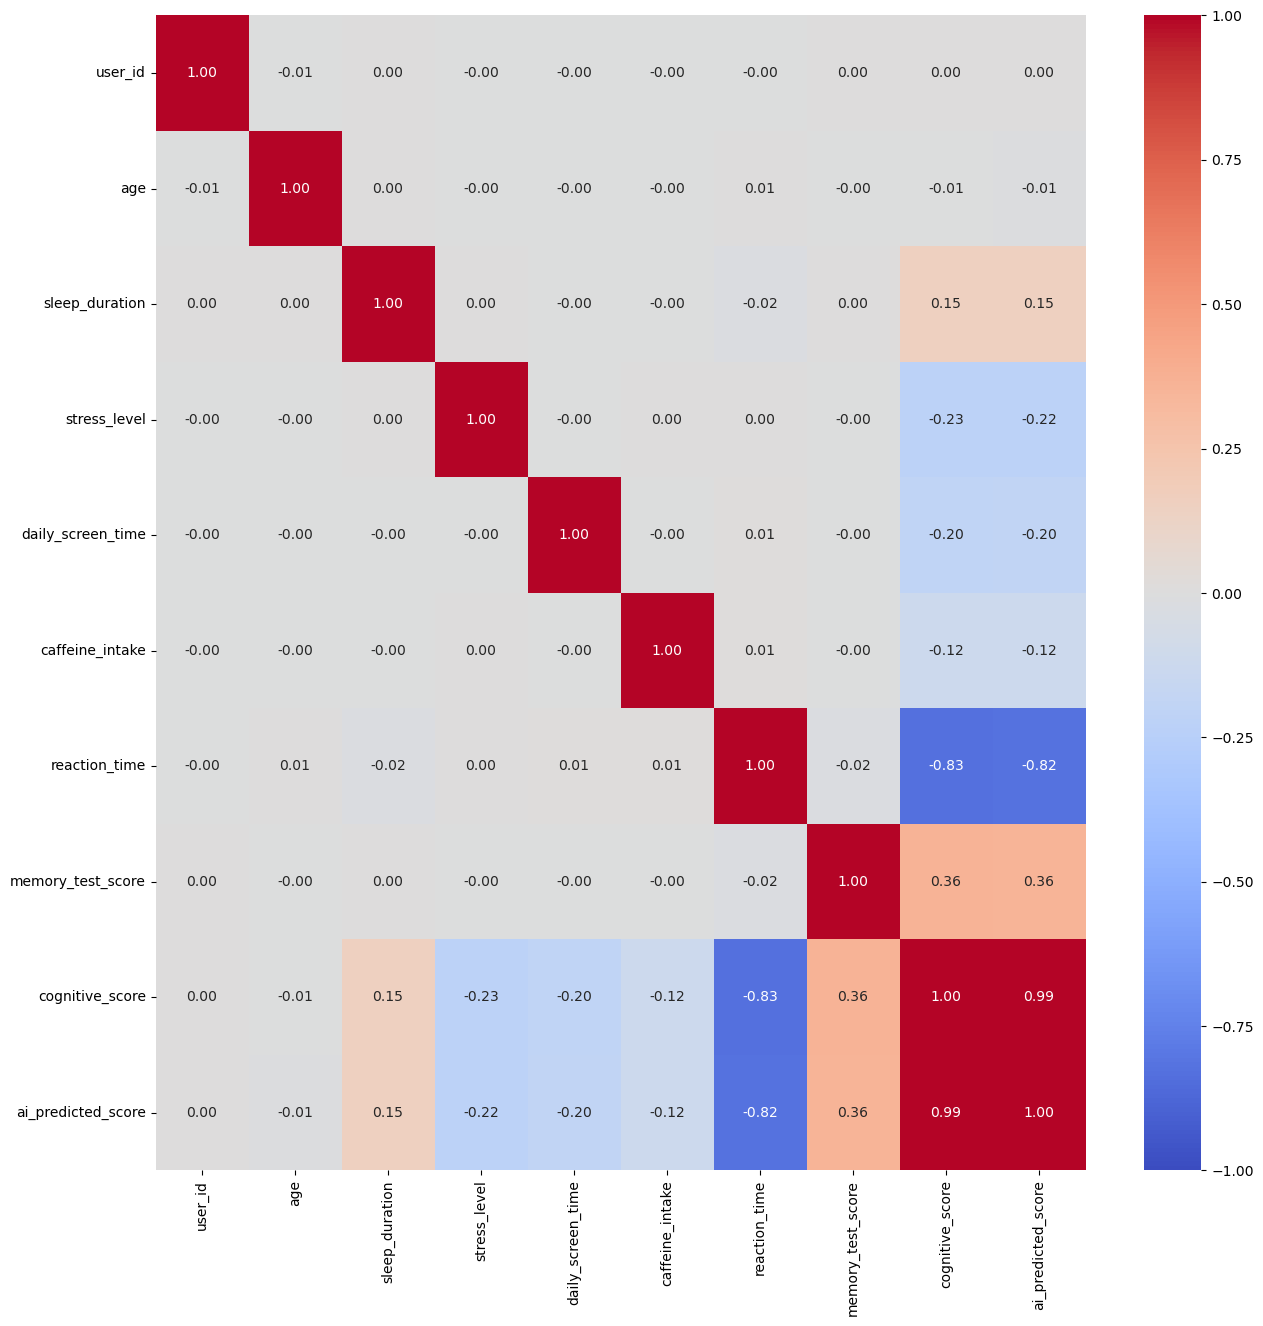

In [58]:
# establecemos el tamaño de la gráfica
plt.figure(figsize = (15, 15))

# convertimos nuestra matriz de correlación a una gráfica
sns.heatmap(df_correlaciones, # sobre que datos queremos hacer el heatmap
            annot = True, # para que nos muestre los valores de cada una de las celdas del heatmap
            fmt = ".2f",  # para que nos redondee a dos decimales
            cmap = "coolwarm", # para establecer el color de la gráfica
            vmax = 1, # para indicar cual es el valor máximo de nuestra escala de colores
            vmin = -1); # para identificar el valor mínimo de nuestra escala de colores

**Observaciones** **AÑADIR A MARKDOWN**
Cercano a 1: Correlación positiva fuerte (cuando una variable aumenta, la otra tiende a aumentar).
Cercano a -1: Correlación negativa fuerte (cuando una variable aumenta, la otra tiende a disminuir).
Cercano a 0: Correlación débil o no lineal entre las variables.

Correlaciones Positivas:
- cognitive_score y ai_predicted_score (0.99): Existe una correlación positiva extremadamente fuerte entre la puntuación cognitiva y la puntuación predicha por la IA. Esto sugiere que el modelo de IA es muy bueno prediciendo la puntuación cognitiva o que ambas variables están midiendo aspectos muy similares del rendimiento cognitivo.
- memory_test_score y cognitive_score (0.35): Existe una correlación positiva moderada, lo que es esperable ya que la memoria es un componente de la cognición. Una mejor puntuación en la prueba de memoria tiende a estar asociada con una puntuación cognitiva más alta.
- sleep_duration y cognitive_score (0.14): Hay una correlación positiva débil pero presente, indicando que una mayor duración del sueño tiende a estar ligeramente asociada con una puntuación cognitiva más alta.

Correlaciones Negativas:
- reaction_time y memory_test_score (-0.82): Hay una correlación negativa fuerte. Un menor tiempo de reacción (que generalmente indica una mejor agilidad mental) está fuertemente asociado con una puntuación más alta en la prueba de memoria.
- reaction_time y cognitive_score (-0.82): Similarmente, una correlación negativa fuerte entre el tiempo de reacción y la puntuación cognitiva. Un menor tiempo de reacción se asocia con una puntuación cognitiva más alta.
- stress_level y cognitive_score (-0.22): Existe una correlación negativa débil, sugiriendo que niveles más altos de estrés tienden a estar ligeramente asociados con una puntuación cognitiva más baja.
- daily_screen_time y cognitive_score (-0.19): Hay una correlación negativa débil, indicando que un mayor tiempo de pantalla diario tiende a estar ligeramente asociado con una puntuación cognitiva más baja.
- caffeine_intake y cognitive_score (-0.12): Una correlación negativa muy débil, sugiriendo una ligera tendencia a que una mayor ingesta de cafeína se asocie con una puntuación cognitiva ligeramente más baja (aunque esta correlación es muy pequeña y podría no ser significativa en la práctica).

Correlaciones Débiles o Nulas (cercanas a 0):
- age tiene correlaciones muy débiles con la mayoría de las variables, aunque hay una ligera correlación negativa con ai_predicted_score (-0.01).
- sleep_duration tiene correlaciones débiles con la mayoría de las variables, aparte de las mencionadas con las puntuaciones cognitivas.
- stress_level tiene correlaciones débiles con la mayoría de las variables, aparte de las mencionadas con las puntuaciones cognitivas.
- daily_screen_time y caffeine_intake también muestran correlaciones débiles en general.

En Resumen:

Las relaciones más notables pueden ser:
La fuerte relación positiva entre prueba de memoria y puntuación cognitiva.
Una mayor duración del sueño tiende a estar ligeramente asociada con una puntuación cognitiva más alta. La ligera relación entre duración del sueño y puntuación cognitiva, a más horas durmiendo la puntuación tiende a ser un poco más alta.
La fuerte relación negativa entre el tiempo de reacción y las puntuaciones de memoria y cognitivas (incluida la predicción de la IA).
Relaciones débiles a moderadas entre el sueño, el estrés, el tiempo de pantalla, la ingesta de cafeína y las puntuaciones de memoria y cognitivas.

### Next steps:
- Explorar las relaciones más fuertes con más detalle: Podrías crear scatter plots entre reaction_time y las puntuaciones cognitivas para visualizar la naturaleza de esta relación negativa.

### Análisis Categóricas y Recomendaciones de Gráficos:
1. gender (Categórica) vs. Variables Numéricas (age, sleep_duration, stress_level, etc.):
        ¿Por qué analizar? Puede haber diferencias significativas en los patrones de sueño, niveles de estrés,
        rendimiento cognitivo, etc., entre los diferentes géneros.
   >    Gráficos recomendados:
           -    Boxplots: Son excelentes para comparar la distribución de una variable numérica entre diferentes categorías. Por ejemplo, un boxplot de sleep_duration por gender mostraría si hay diferencias en la duración del sueño entre hombres, mujeres y otros.
           -    Violin Plots: Similares a los boxplots pero proporcionan una estimación de la densidad de probabilidad de cada grupo, lo que puede dar una mejor idea de la forma de la distribución.
           -    Bar Plots (con intervalos de confianza): Si quieres comparar las medias de una variable numérica entre los géneros, un bar plot mostrando la media y los intervalos de confianza puede ser útil.

2. diet_type (Categórica) vs. Variables Numéricas:
        ¿Por qué analizar? La dieta podría influir en el sueño, los niveles de energía, la función cognitiva y el estrés.
   >    Gráficos recomendados:
           -    Boxplots: Para comparar la distribución de variables como sleep_duration, stress_level, memory_test_score, cognitive_score entre los diferentes tipos de dieta (Non-Vegetarian, Vegetarian, Vegan).
           -    Violin Plots: Para ver la forma de la distribución de estas variables numéricas para cada tipo de dieta.
           -    Bar Plots (con intervalos de confianza): Para comparar las medias de estas variables entre los grupos de dieta.

3. exercise_frequency (Categórica) vs. Variables Numéricas:
        ¿Por qué analizar? La frecuencia de ejercicio es un factor importante para la salud física y mental, 
        y podría estar relacionado con el sueño, el estrés, el tiempo de reacción y el rendimiento cognitivo.
   >    Gráficos recomendados:
           -    Boxplots: Para comparar la distribución de sleep_duration, stress_level, reaction_time, memory_test_score, cognitive_score entre los diferentes niveles de frecuencia de ejercicio (Low, Medium, High).
           -    Violin Plots: Para observar la distribución detallada de estas variables numéricas por frecuencia de ejercicio.
           -    Bar Plots (con intervalos de confianza): Para comparar las medias de estas variables entre los grupos de frecuencia de ejercicio.


### Análisis entre Variables Categóricas:
¿Por qué analizar? Por ejemplo, podría haber una distribución diferente de tipos de dieta entre los géneros o diferentes frecuencias de ejercicio entre los grupos de edad (si hubieras categorizado 'age').
  >    Gráficos recomendados:
   -    Stacked Bar Charts o Grouped Bar Charts: Para comparar las proporciones de una variable categórica dentro de las categorías de otra. Por ejemplo, la proporción de cada tipo de dieta para cada género.
   -    Count Plots (con hue): Puedes usar seaborn.countplot() con el argumento hue para visualizar la distribución de una variable categórica dividida por las categorías de otra.

## 1. Gender vs V. Numéricas

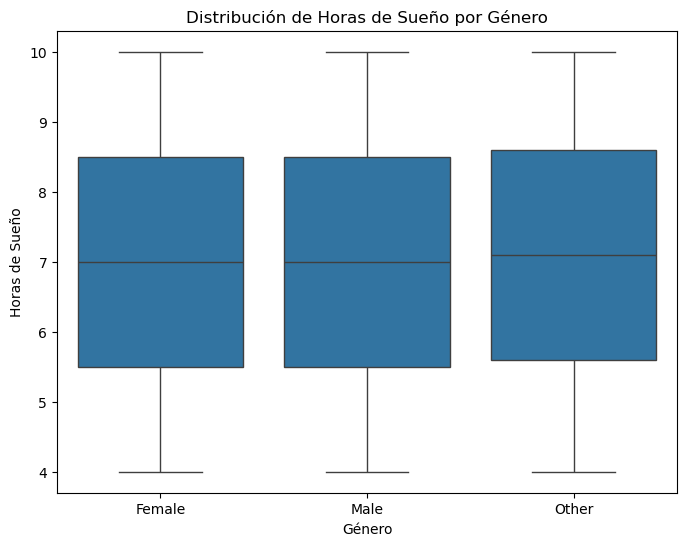

In [59]:
# Boxplot de Sleep Duration por Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='sleep_duration', data=df_analisis)
plt.title('Distribución de Horas de Sueño por Género')
plt.xlabel('Género')
plt.ylabel('Horas de Sueño')
plt.show()

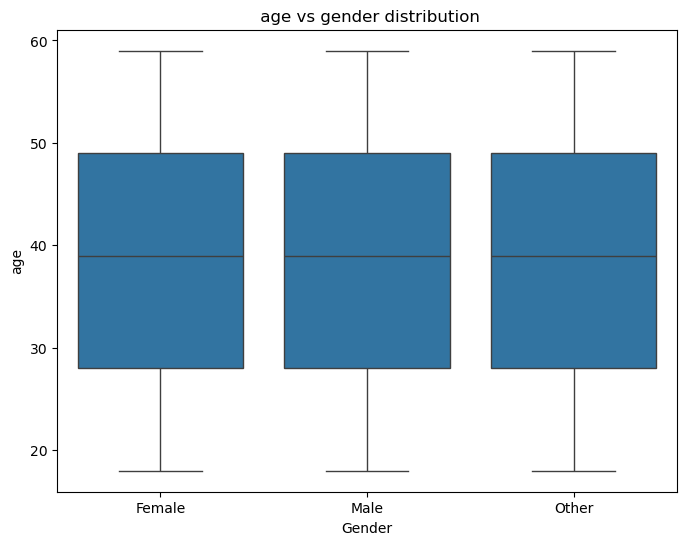

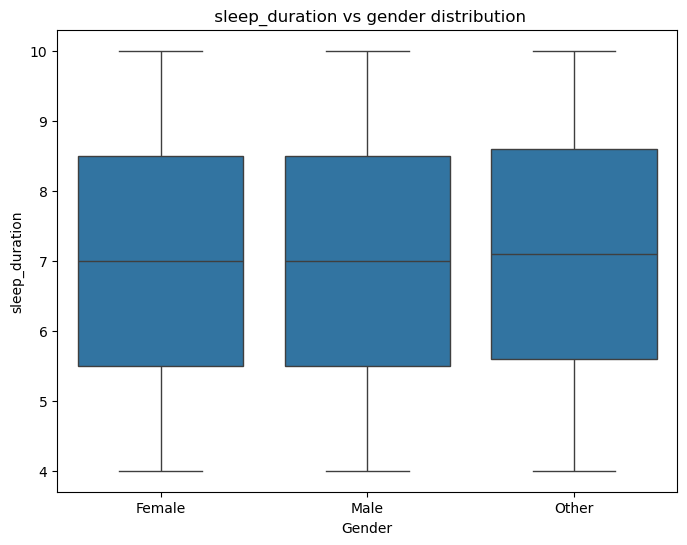

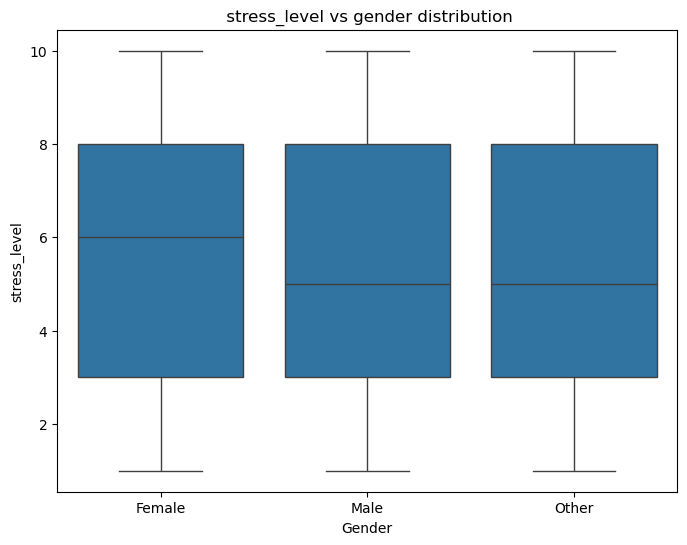

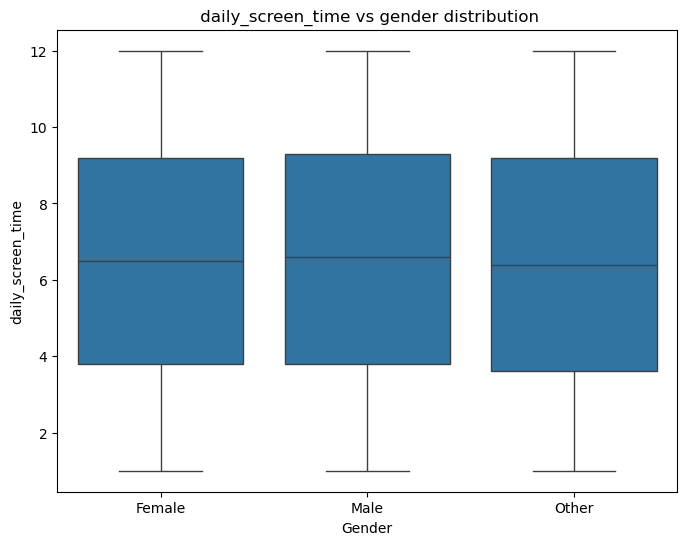

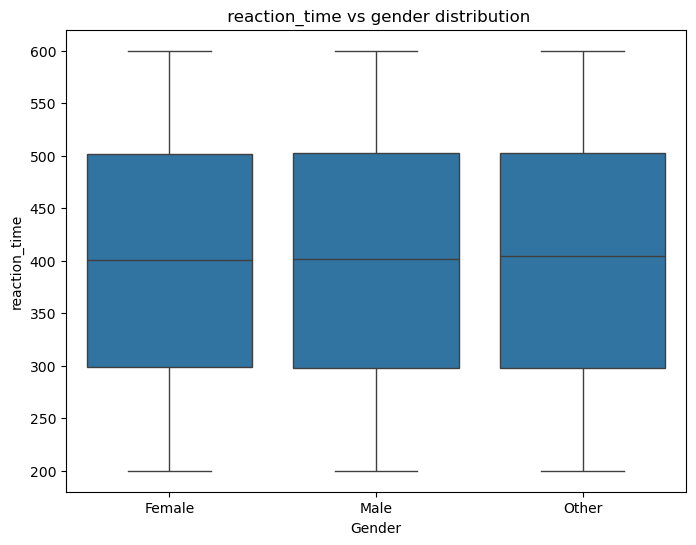

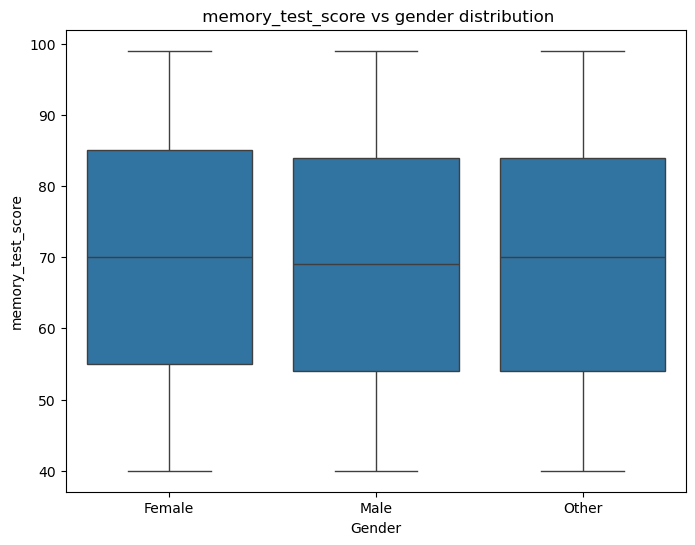

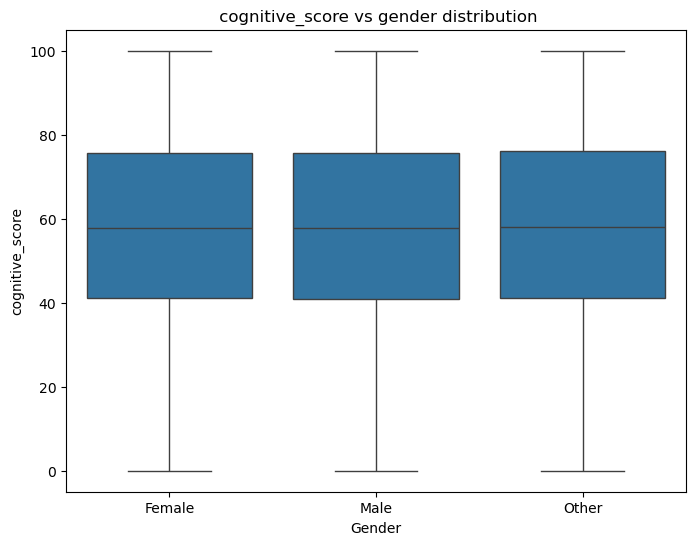

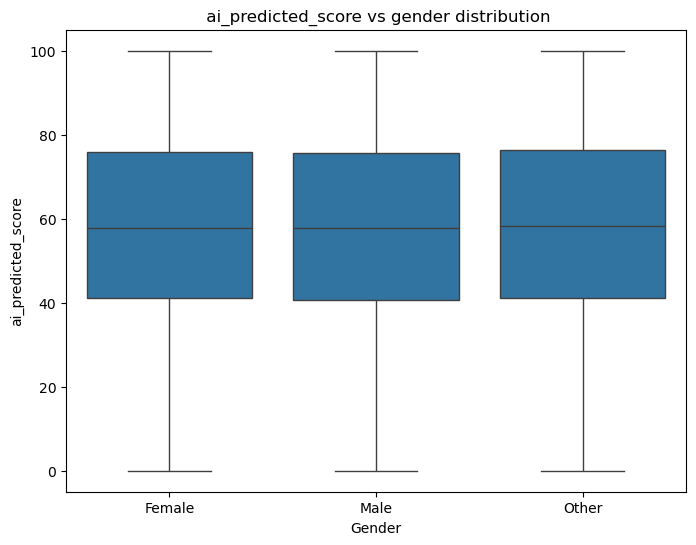

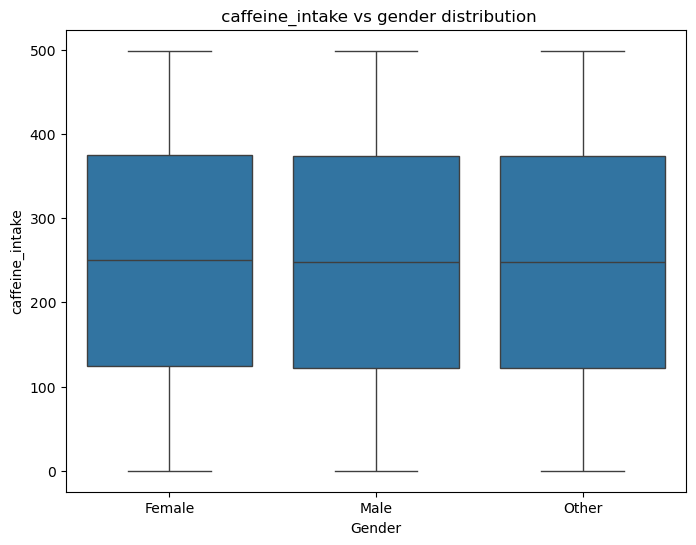

In [60]:
 # Boxplots para comparar distribuciones con género
numerical_cols = ['age', 'sleep_duration', 'stress_level', 'daily_screen_time',
                          'reaction_time', 'memory_test_score', 'cognitive_score',
                          'ai_predicted_score', 'caffeine_intake']

for col in numerical_cols:
            plt.figure(figsize=(8, 6))
            sns.boxplot(x='gender', y=col, data=df_analisis)
            plt.title(f' {col} vs gender distribution')
            plt.xlabel('Gender')
            plt.ylabel(col)
            plt.show()

**No observamos variaciones por género**

<Axes: xlabel='stress_category', ylabel='count'>

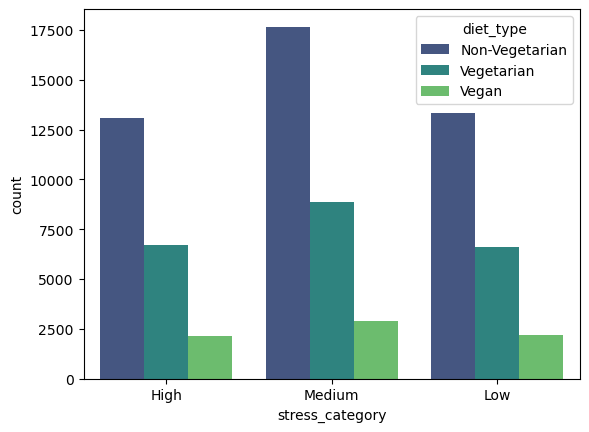

In [61]:
# Gráfico de barras para comparar categorías de nivel de estrés y tipo de dieta
sns.countplot(x = "stress_category",
              data = df_analisis,
              palette = "viridis", 
              hue = "diet_type")

<Axes: xlabel='gender', ylabel='count'>

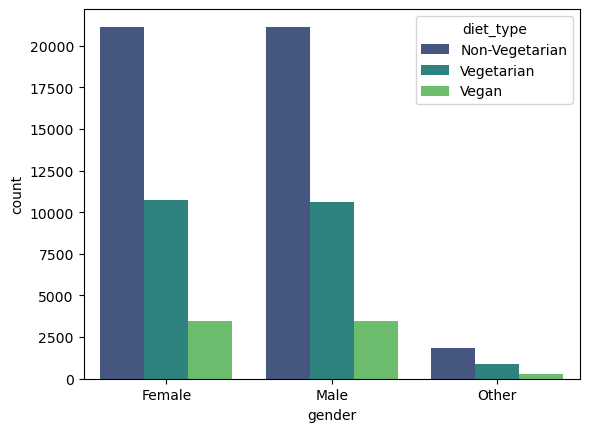

In [62]:
# Gráfico de barras para comparar  género y tipo de dieta
sns.countplot(x = "gender",
              data = df_analisis,
              palette = "viridis", 
              hue = "diet_type")

<Axes: xlabel='diet_type', ylabel='generation'>

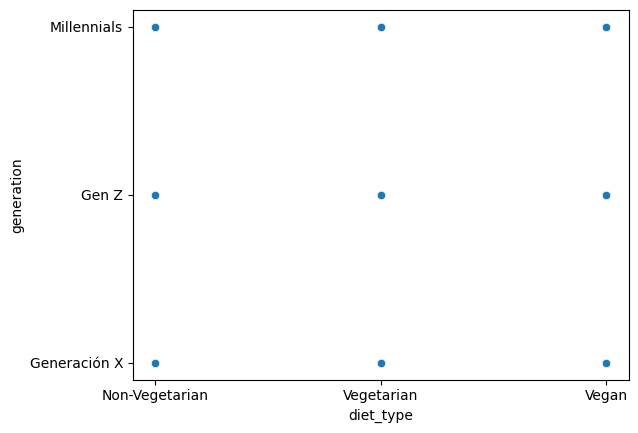

In [63]:
sns.scatterplot(x = "diet_type",
                y = "generation",
                data = df_analisis)

In [64]:
df_analisis.columns

Index(['user_id', 'age', 'gender', 'sleep_duration', 'stress_level',
       'diet_type', 'daily_screen_time', 'exercise_frequency',
       'caffeine_intake', 'reaction_time', 'memory_test_score',
       'cognitive_score', 'ai_predicted_score', 'generation',
       'stress_category', 'caffeine_category', 'reaction_time_category',
       'memory_score_category', 'cognitive_category', 'ai_cognitive_category'],
      dtype='object')

*Multivariedad: Las relaciones entre variables pueden ser complejas y estar influenciadas por otras variables. Consideramos la posibilidad de realizar análisis multivariados más adelante si encuentras relaciones interesantes a nivel bivariado.*

In [65]:
df_analisis.to_csv("test.csv")

In [66]:
df_analisis.to_excel('test.xlsx', index=True)